# 10/05 - Pair Programming Limpieza 3 - Guadalupe & Lara

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
df = df = pd.read_csv("ataques_enproceso_2.csv", index_col = 0)

In [2]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,age2
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,57.0
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018,11.0
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018,48.0
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018,NaN
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018,NaN


In [3]:
df.shape

(6288, 16)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

-*¿Sobre que columnas podremos eliminar o reemplazar los outliers?*



In [4]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,year,age2
0,2018.0,57.0
1,2018.0,11.0


-*Identifica visualmente los outlier.*



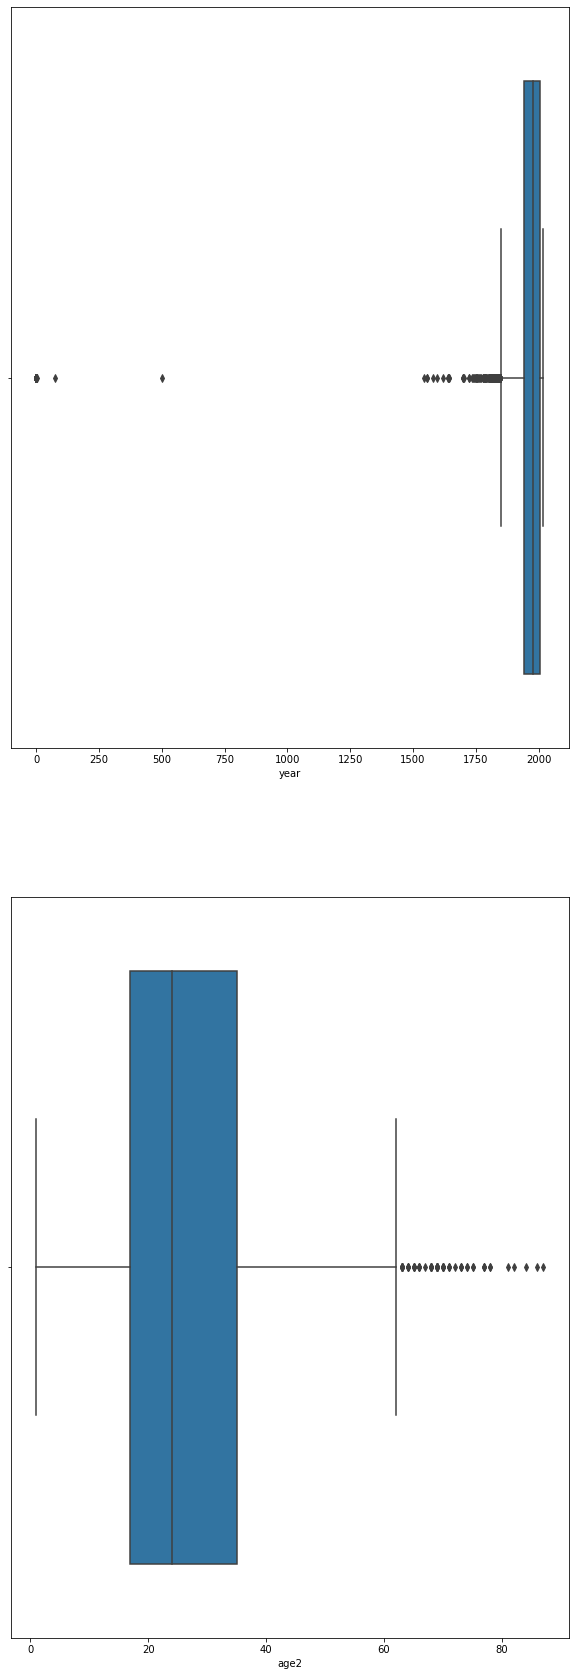

In [5]:
# Sabemos que tenemos 2 columnas numéricas, "year" y "age_2"
fig, ax = plt.subplots(2, 1, figsize=(10,30))
0
for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

-*Identifica sobre el dataframe las filas que son outliers*


In [7]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'age2']

In [13]:
#Funcion para cuando podamos usar "new age"
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}
    
    for col in lista_columnas:
        
    
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        
        IQR = Q3 - Q1
        
    
        outlier_step = 1.5 * IQR
        
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = (list(outliers_data.index)) 
            
        

    
    return dicc_indices

ind = detectar_outliers(lista_columnas, df)

In [12]:
print(ind)

{'year': [6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 

-*Reemplaza los outliers por el estadístico más correcto.*

-*Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.*

In [14]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    mediana = df[k].median() 
    for i in v:
        df.loc[i,k] = mediana 

In [ ]:
df.to_csv("3.ataques_enproceso3.csv")